https://colab.research.google.com/drive/1HrJaZ-1ZyS2zilEeh5WegACKa-PcGl2S?usp=sharing

# Machine Learning Exercise - Support Vector Machines

The idea of this exercise is to use support vector machines (SVMs) to build a spam classifier.  

We'll start with SVMs on some 2D data sets.  Then we'll do some pre-processing work on a set of raw emails and build a classifier using a SVM to determine if they are spam or not.

1) Load the dataset "session12_data1.mat". Explore the data and see how a linear SVM works on the data set for several values of C. Start from C=1. Compare the results and look at the confidence level for each class prediction. Comment the results.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.io import loadmat
from sklearn.model_selection import GridSearchCV

Load the dataset:

In [ ]:
# Load the dataset
data = loadmat('/content/session_12_data1.mat')
X = data['X']
y = data['y'].flatten()

First we want to look at how the data is distributed:

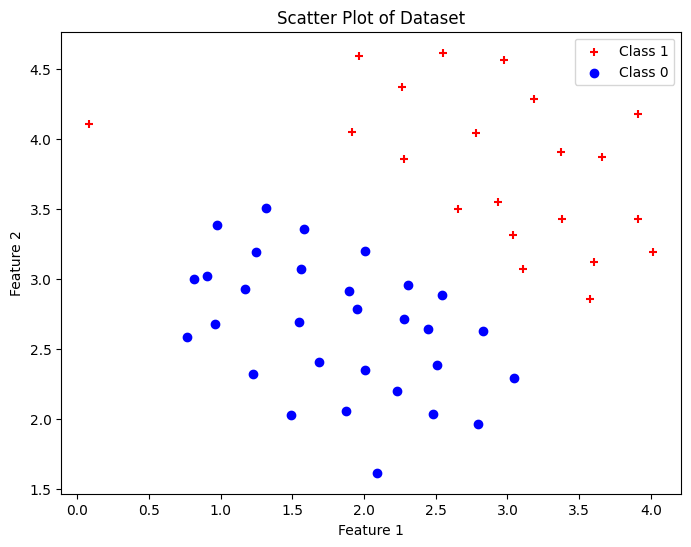

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', color='r', marker='+')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', color='b', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter Plot of Dataset')
plt.show()

Observations:
- Class Distribution: There appears to be a roughly equal distribution of Class 1 and Class 0 points. There are a few more of class 0.
- Clustering of Data Points: The blue points are clustered more in the center of the plot, whilst the red points are more spread around the top right.
- Outliers: It looks like there is one outlier from class 1.
- Feature Scale: Both features appear to be on a similar scale, as their values range approximately from 0 to 4.5. This is beneficial for many ML algorithms that are sensitive to feature scaling.


Next, we will see how a linear SVM works on the data set for several values of C starting from C=1:

In [ ]:
# Define a function to plot decision boundaries and support vectors
def plot_svm_decision_boundary(svm, X, y, C):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(f'Linear SVM with C={C}')
    plt.show()

    print(f'Number of support vectors: {len(svm.support_vectors_)}')
    print(f'Model accuracy: {svm.score(X, y)}')

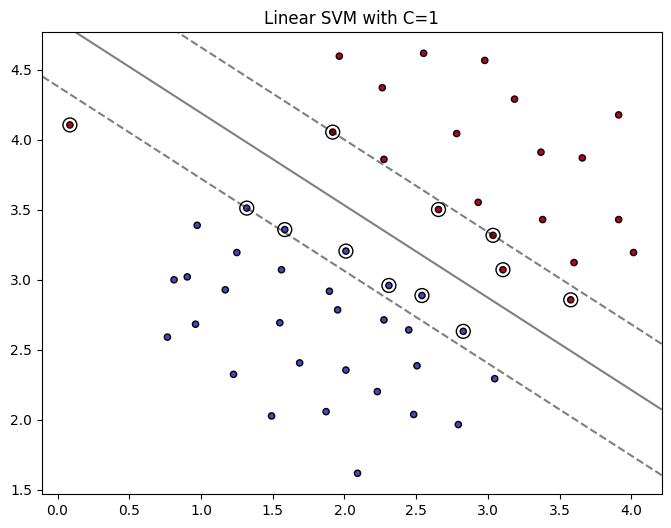

Number of support vectors: 12
Model accuracy: 0.9803921568627451
Confidence scores for C=1: [ 2.22237121  1.0876891   3.5836762   1.35665588  0.779535    2.11624609
  1.72699229  4.0667434   2.1940707   3.09283937  2.73711357  0.57337293
  1.00024232  2.16346429  0.85852265  3.28590768  3.05524394  2.47265996
  1.37975249  1.00024201 -0.95493544 -0.68297233 -1.65944445 -1.35827937
 -0.78527174 -0.75466533 -1.16735029 -2.50771951 -1.73272903 -3.32341386
 -2.49536199 -3.66326441 -1.45646554 -1.59904025 -2.4231479  -2.84013295
 -3.92372564 -3.27184946 -2.45603426 -2.80574725 -1.74886318 -1.77462217
 -1.00048702 -2.51510846 -1.26776998 -2.22295047 -3.95433235 -0.61406257
 -2.63204473 -3.74398637 -1.46838687]



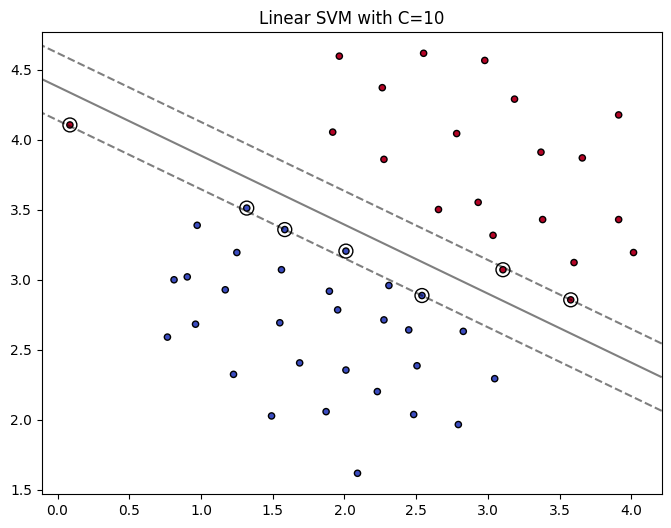

Number of support vectors: 7
Model accuracy: 0.9803921568627451
Confidence scores for C=10: [ 4.93521518  2.50519318  6.88727542  2.57388905  0.99966957  3.30380813
  2.98436155  7.18168245  4.31191427  6.22563582  4.96338682  0.92551212
  2.5825926   4.61225421  1.79396752  6.16221198  5.38402637  4.07127567
  2.15485079  1.8064215  -1.00033606 -0.76569769 -2.63100253 -2.26742831
 -1.17339638 -1.47373632 -2.43108388 -4.65429008 -3.15808836 -5.82179065
 -4.30206781 -6.03678375 -2.19493946 -2.24108161 -3.84110915 -4.75079613
 -6.72905911 -5.08905837 -3.64120605 -4.07554557 -2.12536521 -2.36767242
 -0.90515886 -4.49263664 -2.210914   -4.31472068 -7.20489027 -0.99935627
 -3.80065224 -5.87427162 -0.96195389]



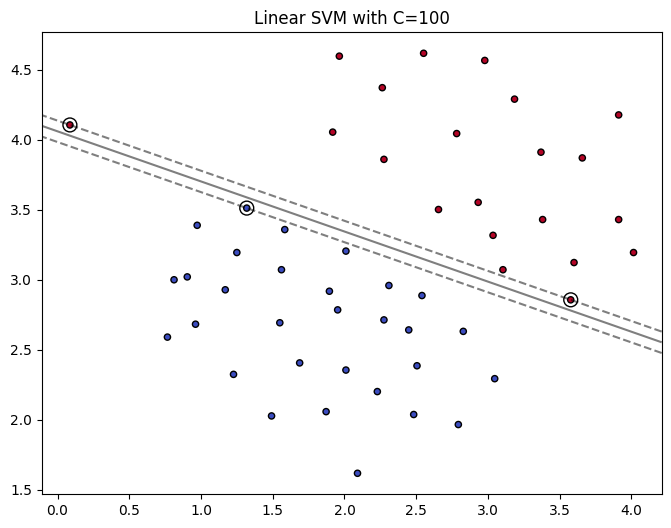

Number of support vectors: 3
Model accuracy: 1.0
Confidence scores for C=100: [ 16.2205912    8.03223703  20.56616443   7.08812235   0.99968557
   7.46955389   7.58460717  19.84315158  12.81636773  19.23930925
  13.82632428   1.60106391   8.9063683   14.67626823   5.1248155
  17.92049527  14.63970774  10.0653369    4.59046124   4.49233934
  -1.76666676  -1.78194774  -7.54393316  -6.9708837   -3.59282722
  -5.45272771  -8.84909221 -14.84054996 -10.17774882 -17.43205253
 -12.89881255 -16.96814984  -6.07138288  -5.62624419 -10.63574501
 -13.73972746 -19.61249789 -13.52095073  -9.3357072  -10.0702686
  -4.224657    -5.47480866  -0.99934499 -13.88456961  -7.0986556
 -14.32264675 -22.16662635  -3.4527215   -9.36899126 -15.64336137
   0.99968063]



In [ ]:
# Values of C to try starting at C = 1:
C_values = [1, 10, 100]

for C in C_values:
    # Apply a Linear SVM for Several Values of C
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Visualize the decision boundary and support vectors
    plot_svm_decision_boundary(svm, X, y, C)

    # Look at the Confidence Level for Each Class Prediction
    confidence_scores = svm.decision_function(X)
    print(f'Confidence scores for C={C}: {confidence_scores}\n')

 Now we will look at the confidence level for each class prediction:

####Observations:
- C=1: With C set to 1, tere are 12 support vectors, as indicated in the graph. The model accuracy is quite high, and the confidence scores are also relatively high. It's likely that points with higher positive confidence scores are those well within the margin on one side of the decision boundary.

- C=10: Here, the decision boundary is more aggressive in fitting to the data points, with a further reduced number of support vectors. The first 10 confidence scores are shown, with higher absolute values indicating stronger confidence in the classification. The model achieves high accuracy, similar to the C=1 case, but the decision boundary is closer to the data points, which might start to indicate a tendency to overfit.

Until now, it appears that all of them have mis-classified the outlier.

- C=100: This model shows the highest confidence levels and the least number of support vectors. The decision boundary is very close to the data points, and the model achieves perfect accuracy on the training data.
However, this could be a sign of overfitting, as the model is very strict in classifying the training examples correctly, possibly at the cost of losing generalizability.

 Based on these results, a C value around 1 seems to provide a good balance between bias and variance, achieving high accuracy while still maintaining some robustness to outliers.

**Generalization vs. Overfitting:** Lower C values favor generalization but may underfit. Higher C values capture more details but risk overfitting to the training data.

**Decision Boundary Complexity:** As C increases, the decision boundary becomes more tailored to the individual data points, particularly those near the class margins. This can improve accuracy on the training dataset but may not necessarily translate to unseen data.

**Model Confidence:** Higher C values make the model more confident in its classifications, reflected in larger margins for the decision function. However, overconfidence in areas without sufficient data support can lead to poor generalization.

2) Move from a linear SVM to one that's capable of non-linear classification using kernels. Test the gaussian kernel function. Comment the results.

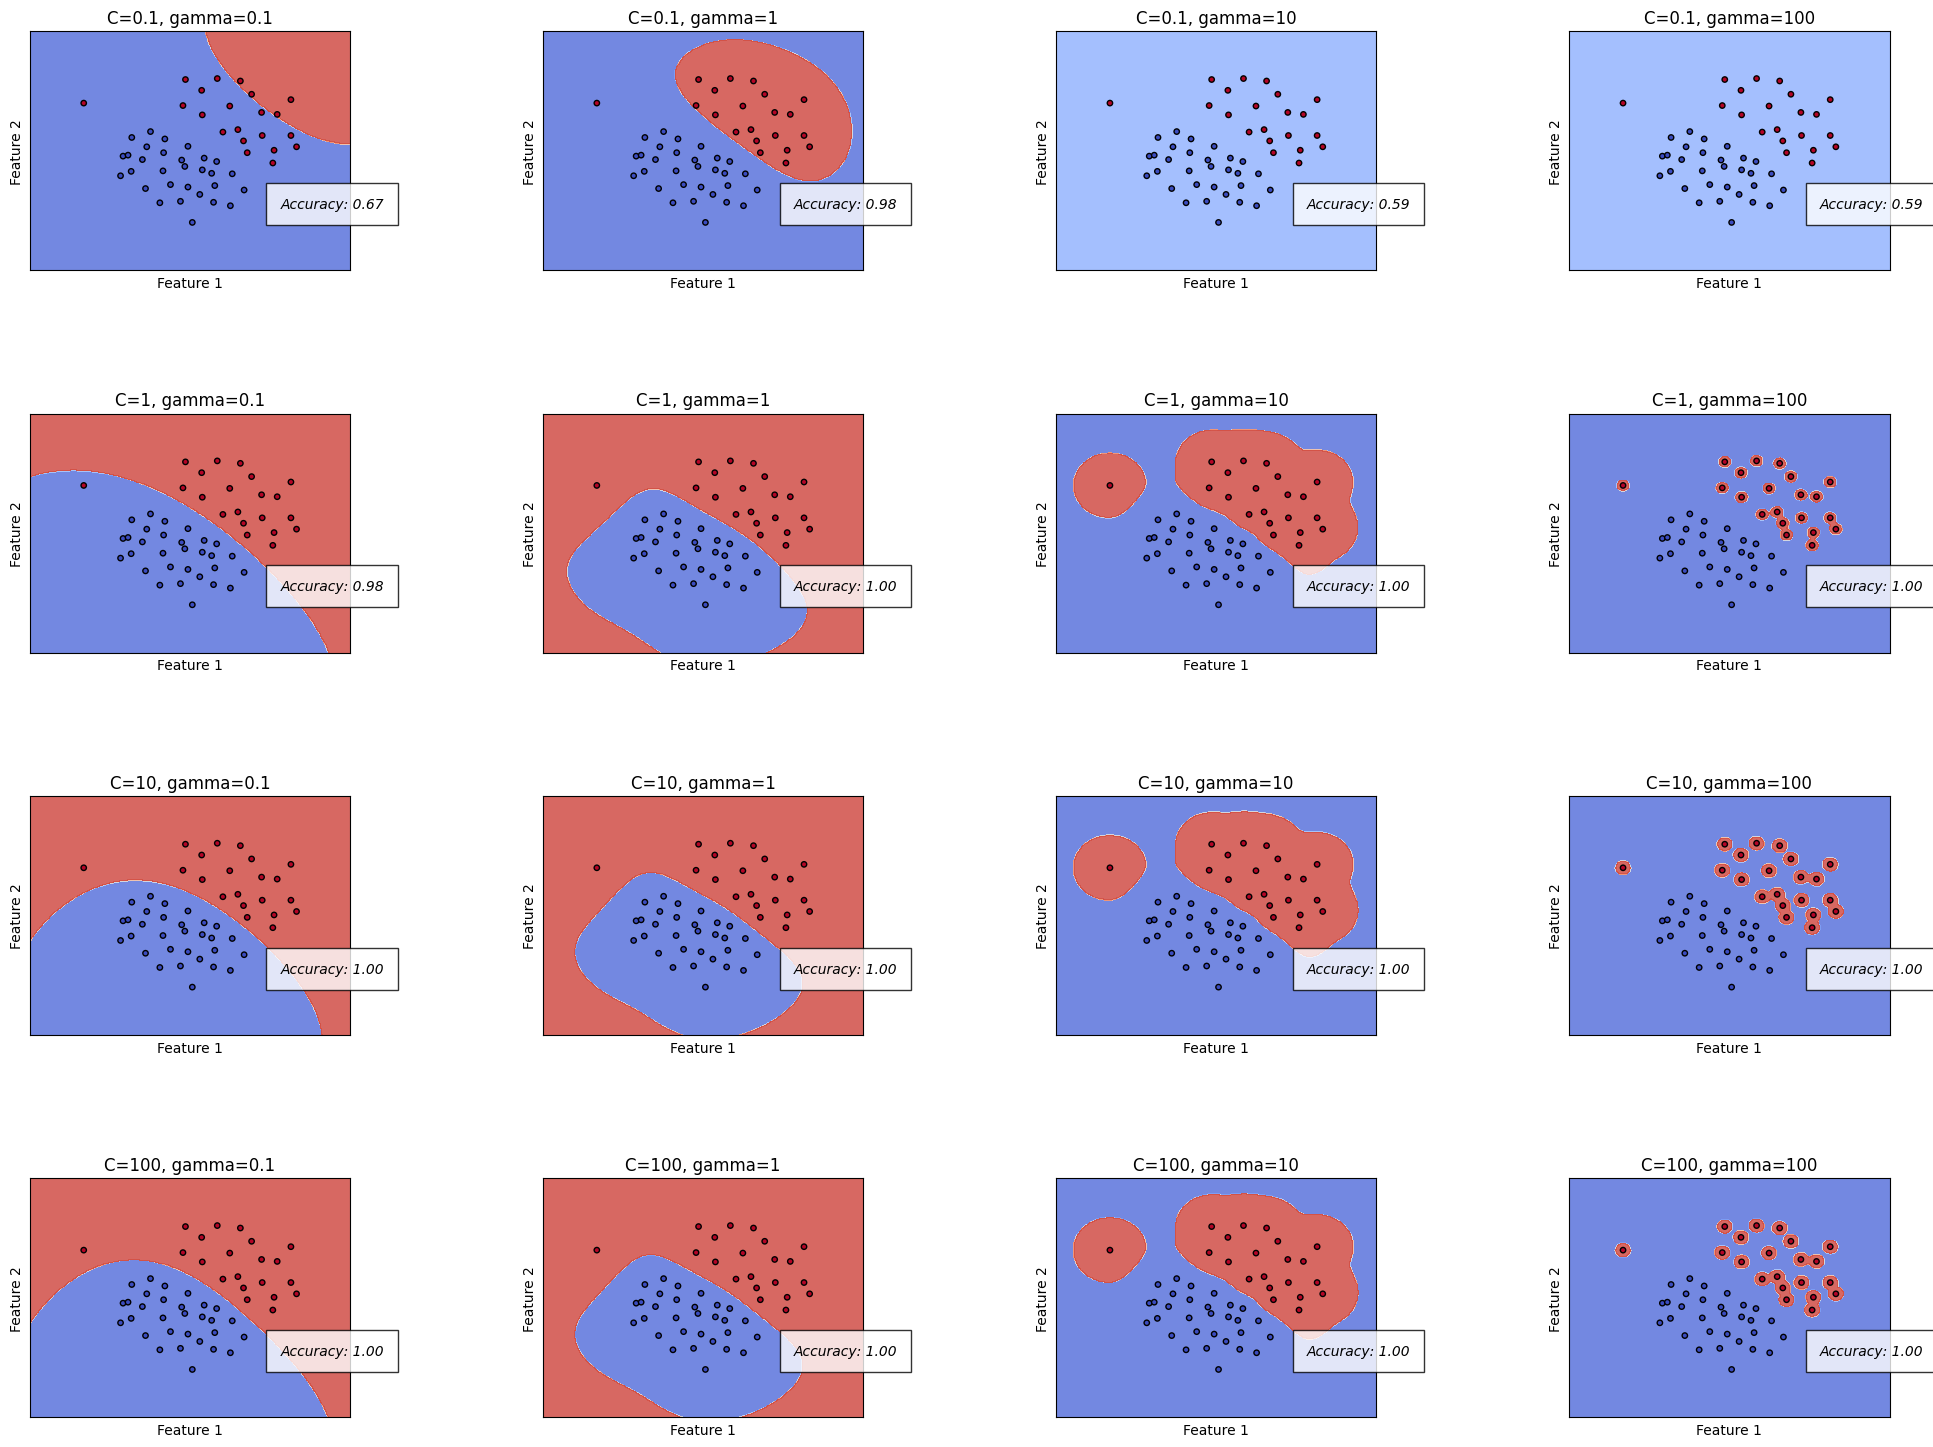

1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C_values = [0.1, 1, 10, 100]  # Example C values
gamma_values = [0.1, 1, 10, 100]  # Example gamma values

# Set up plot
fig, sub = plt.subplots(len(C_values), len(gamma_values), figsize=(24, 18))  # Increased figure size
plt.subplots_adjust(wspace=0.6, hspace=0.6)  # Adjusted spacing


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        ax = sub[i, j]

        # Initialize the SVM model with the RBF kernel
        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma, probability=True)
        svm_rbf.fit(X, y)

        plot_contours(ax, svm_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=15, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(f'C={C}, gamma={gamma}')

        # Predictions for accuracy and decision function for confidence scores
        y_pred = svm_rbf.predict(X)
        accuracy = accuracy_score(y, y_pred)
        ax.text(np.max(X0) - 0.3, np.min(X1) + 0.3, f'Accuracy: {accuracy:.2f}', style='italic',
                bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})

plt.show()
print(accuracy)


Here it looks as the C parameter has a stronger influence on the model complexity than the gamma parameter. We can see this if we focus on the accuracy of C=0.1, gamma=100 where the accurracy is quite low compared to that of when we increase C to 1.

We can see that we do not need such big values of C and gamma to achieve a perfect score. When the values of gamma increase, we can see that the model is fitting the data too tightly leading to overfitting. This however, does not happen when the value of C increases. In this case, we would only need a value of c=1 and gamma=0,1 to obtain a perfect score.

3) Examine another data set, this time with a non-linear decision boundary: "session12_data2.mat". Explore the data and use a Gaussian kernel with the SVM for classification. Comment the results.

In [ ]:
# Load the dataset
data2 = loadmat('/content/session_12_data2.mat')

First we plot the data to see how it is distributed

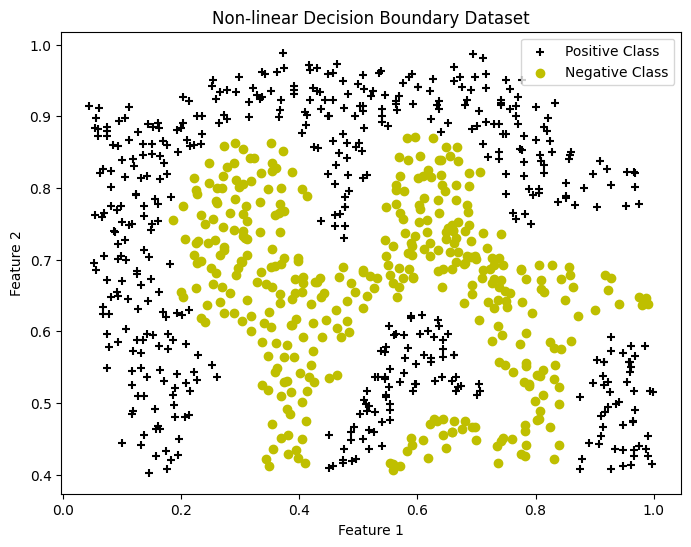

In [ ]:
# Extract X (features) and y (labels) from the data
X = data2['X']
y = data2['y'].ravel()

# Visualizing the dataset
import matplotlib.pyplot as plt

# Plotting function
def plot_data(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='k', marker='+', label='Positive Class')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='y', marker='o', label='Negative Class')
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_data(X, y)
plt.title('Non-linear Decision Boundary Dataset')
plt.show()


Observations:
- Class Distribution: The positive and negative classes are intermixed, with the negative class concentrated in three main clusters.
- Separability: The classes are non-linearly separable. The negative class forms what appears to be clusters or islands within the positive class.
- Feature Range: Both features appear to be normalized or scaled to a [0, 1] range.
- Density of Points: There is a varying density of points in different regions of the plot. The positive class is more sparse, while the negative class shows denser regions, indicating variability in the distribution of both classes.

This code from below uses the built-in 'rbf' kernel option of the SVC class from the scikit-learn library, which internally computes the Gaussian kernel. This is a more concise and less error-prone approach when working with standard kernels.


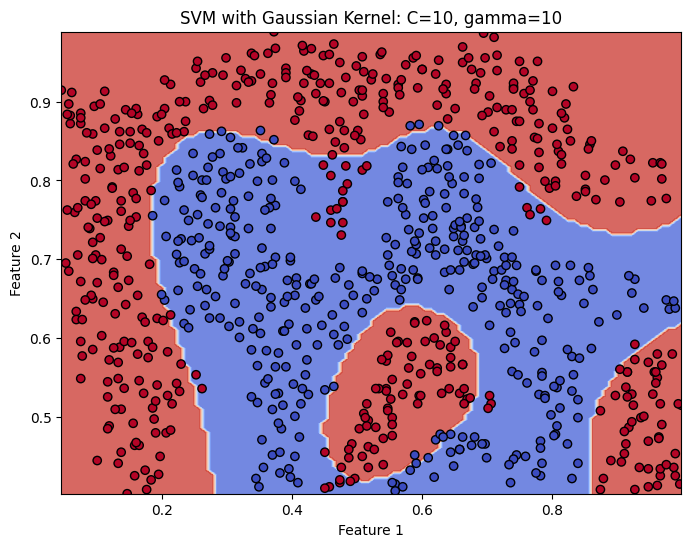

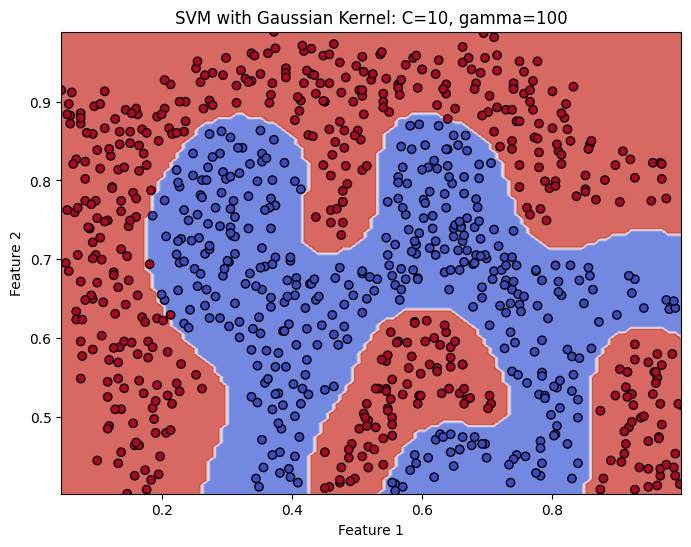

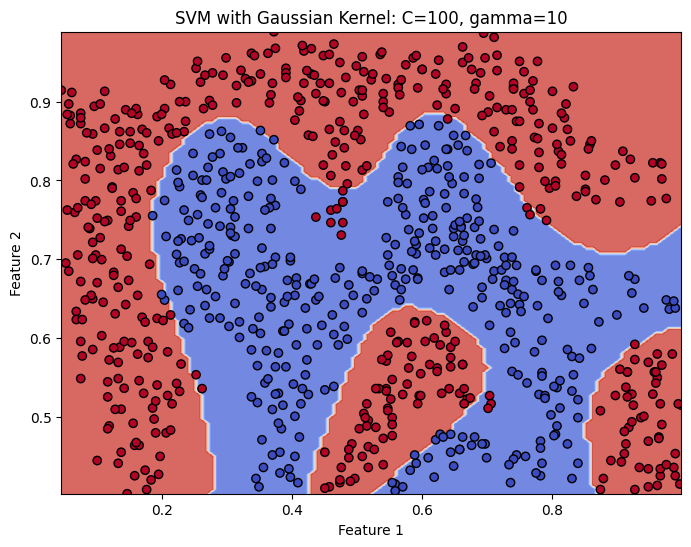

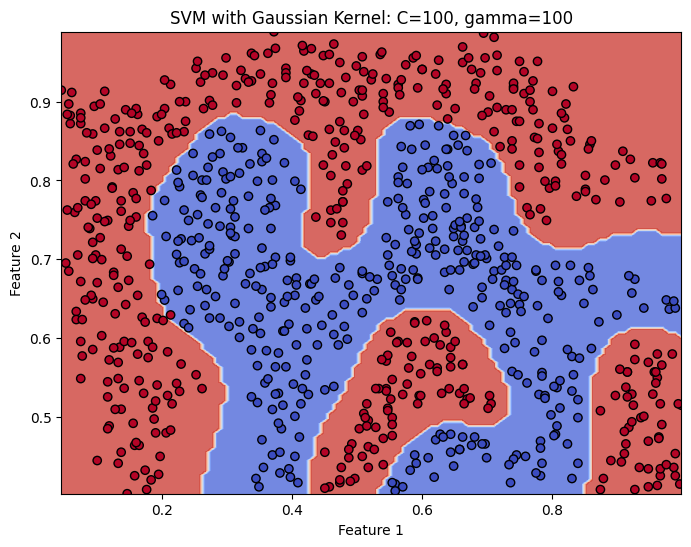

In [ ]:
def plot_svm_decision_boundary(C_value, gamma_value):
    # Train the SVM classifier using the RBF kernel
    svm_classifier = SVC(kernel='rbf', C=C_value, gamma=gamma_value)
    svm_classifier.fit(X, y)

    # Create a grid to evaluate the model
    x1_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    X1, X2_mesh = np.meshgrid(x1_plot, x2_plot)
    X_grid = np.c_[X1.ravel(), X2_mesh.ravel()]

    # Predict values across the grid
    Z = svm_classifier.predict(X_grid).reshape(X1.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2_mesh, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f"SVM with Gaussian Kernel: C={C_value}, gamma={gamma_value}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Values for C and gamma to test
C_values = [10, 100]
gamma_values = [10, 100]

# Loop over the desired values of C and gamma and plot the decision boundary for each
for C_value in C_values:
    for gamma_value in gamma_values:
        plot_svm_decision_boundary(C_value, gamma_value)


We can see that as gamma and C increases, the decision boundaries are much more adapted to the training data, indicating overfitting.

Here it looks like when C=100 and gamma=10 the model is does not fit the data as tightly as when gamma=100 and C=10.

- When C=10 and gamma=100, the decision boundary is complex, and the model is very sensitive to the data points due to the high gamma value. Despite the relatively lower C value (which would normally smooth out the decision boundary by allowing more misclassifications), the high gamma value here has a dominant effect, causing the model to fit closely to the data points.

- Nevertheless, when C=100 and gamma=10, you'd expect a complex decision boundary due to the high C value, which would normally cause the SVM to fit more closely to the data points. However, because gamma is now lower, the influence of individual samples is less localized, which leads to a smoother decision boundary overall.

This suggests that in this particular dataset and scenario, the gamma parameter has a stronger influence on the model complexity than the C parameter.

Next, we will see the accurracy when using sigma:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Sigma values to test
sigma_values = [0.1, 0.5, 1, 5, 10]

for sigma in sigma_values:
    gamma_value = 1 / (2 * sigma ** 2)

    # Train a SVM classifier using the Gaussian kernel with the current gamma value
    svm_classifier = SVC(kernel='rbf', C=100, gamma=gamma_value)
    svm_classifier.fit(X, y)

    # Calculate the accuracy on the training set
    accuracy = svm_classifier.score(X, y)

    print(f"Accuracy for sigma={sigma}: {accuracy:.2f}")


Accuracy for sigma=0.1: 1.00
Accuracy for sigma=0.5: 0.84
Accuracy for sigma=1: 0.82
Accuracy for sigma=5: 0.62
Accuracy for sigma=10: 0.58


- A sigma value of 0.1 gives perfect accuracy on the training data which could indicate overfitting.
- Accuracy for sigma=0.5: 0.84: As sigma increases, the kernel width increases, leading to smoother decision boundaries that do not fit the training data as tightly. An accuracy of 0.84 suggests that the model is starting to generalize better.
- We can see that as sigma increses, it leads to a smoother and broader kernel function, indicating that the model is likely underfitting the data—it is too general and not capturing the patterns within the data well.

From these results, a sigma value around 0.5 might offer a reasonable balance

Below we can also see a code that defines a function to calculate the Gram matrix using an RBF kernel and a function to visualize the decision boundary of an SVM trained with a Gaussian kernel.



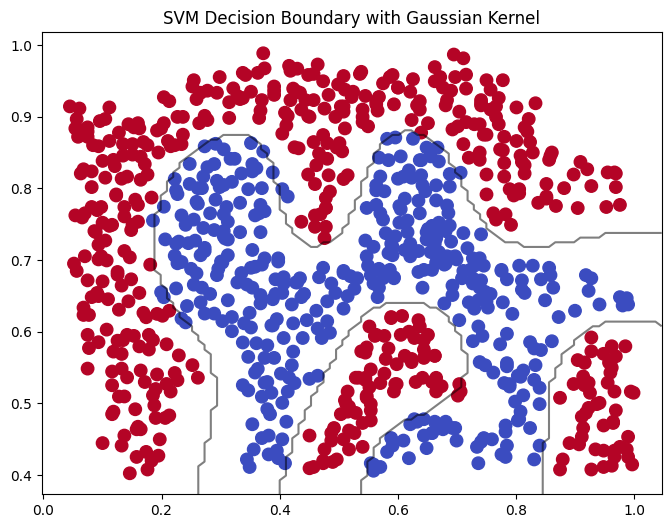

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import matplotlib.pyplot as plt

# Correcting the Gaussian kernel function to match the provided definition
def gaussian_kernel(x1, x2, sigma=0.1):
    """
    Computes the gaussian kernel between two vectors.
    The gaussian kernel is also known as the radial basis function (RBF).
    It is a measure of similarity between x1 and x2.

    Parameters:
    x1, x2: Vectors between which the kernel is to be computed.
    sigma: Controls the smoothness of the boundary.

    Returns:
    Gaussian kernel value.
    """
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))

# Gaussian kernel function using RBF kernel
def gaussian_kernel_gram_matrix(X1, X2, sigma_value=0.1):
    return rbf_kernel(X1, X2, gamma=1 / (2 * sigma_value ** 2))

# Plot function for SVM with Gaussian kernel
def visualize_gaussian_svm_decision_boundary(feature_data, target_data, svm_model, sigma_value, plot_title):
    # Set up the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=80)


    # Setting the axes limits
    ax = plt.gca()
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()

    # Creating a grid to evaluate the model
    xx = np.linspace(x_limits[0], x_limits[1], 100)
    yy = np.linspace(y_limits[0], y_limits[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Compute the Gram matrix for the grid
    Z_gram_matrix = gaussian_kernel_gram_matrix(xy, feature_data, sigma_value=sigma_value)

    # Predict using the SVM model and the precomputed Gram matrix
    Z = svm_model.predict(Z_gram_matrix).reshape(XX.shape)

    # Plot the decision boundary
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(plot_title)
    plt.show()

# Define the SVM with a precomputed kernel
svm_gaussian = SVC(kernel="precomputed", C=1)

# Compute the Gram matrix for the given data and sigma value
sigma_value_for_gaussian = 0.1
X_gram = gaussian_kernel_gram_matrix(X, X, sigma_value=sigma_value_for_gaussian)

# Train the SVM model
svm_gaussian.fit(X_gram, y)

# Visualize the decision boundary
visualize_gaussian_svm_decision_boundary(X, y, svm_gaussian, sigma_value_for_gaussian, 'SVM Decision Boundary with Gaussian Kernel')


4) Load the third data set "session12_data3.mat". Here we have training and validation sets and our task is to use the cross validation set to determine the best C and σ parameter to use, based on validation set performance.

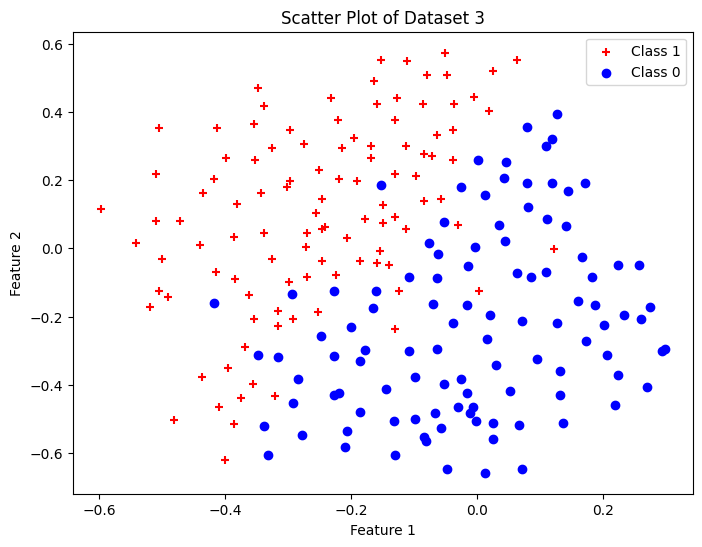

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the dataset
data = loadmat('/content/session_12_data3.mat')
X = data['X']
y = data['y'].flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', color='r', marker='+')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', color='b', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter Plot of Dataset 3')
plt.show()

Observations:
- Data Distribution: The data points are spread out mostly along the x-axis (Feature 1), with the range of Feature 2 being more confined.
- Class Separation: The classes do not show a clear linear boundary between them.
- Class 1 Characteristics: The points for Class 1 are more scattered and less dense than those for Class 0, suggesting higher variance within this class.
- Class 0 Characteristics: The points for this class are denser and seem to form a cluster around the center of the plot, mostly towards the right side.
- Overlap: There is some overlap between the two classes, particularly in the middle region of the plot.
- Feature Scaling: Both features seem to be on a similar scale, as the axes have comparable ranges, which is good for many machine learning algorithms that are sensitive to the scale of the input features.


In [ ]:
import numpy as np
import scipy.io as sio
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = data['X']
y_train = data['y'].flatten()
X_val = data['X']
y_val = data['y'].flatten()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

# Perform grid search
for C in C_values:
    for gamma in gamma_values:
        # Initialize the SVM with the 'rbf' kernel (which is the Gaussian kernel)
        svm = SVC(C=C, gamma=gamma)

        # Train the SVM
        svm.fit(X_train, y_train)

        # Predict on the validation set
        predictions = svm.predict(X_val)

        # Calculate the accuracy on the validation set
        score = accuracy_score(y_val, predictions)

        # If the score is better than the best score, update the best score and parameters
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

# Output the best parameters
print("Best score:", best_score)
print("Best parameters:", best_params)


Best score: 0.995260663507109
Best parameters: {'C': 100, 'gamma': 100}


The best parameters found were 'C': 100, 'gamma': 100, which are both high values, suggesting a complex decision boundary.

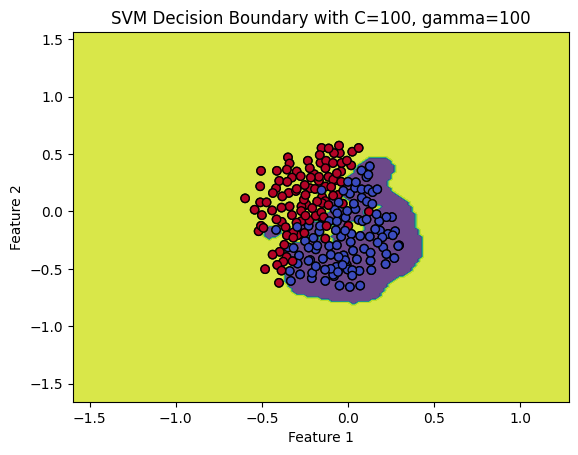

In [ ]:
# Initialize the SVM with the best parameters found
best_C = 100
best_gamma = 100
svm_best = SVC(C=best_C, gamma=best_gamma)

# Train the SVM on the entire dataset (train + validation)
X_combined = np.vstack((X_train, X_val))
y_combined = np.hstack((y_train, y_val))
svm_best.fit(X_combined, y_combined)

# Create a grid to evaluate the model
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Evaluate the model on the grid
Z = svm_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot also the training points
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with C={}, gamma={}'.format(best_C, best_gamma))
plt.show()


Eventhough with those parameters we got the best accuracy score, it does not mean those parameters are the best. With this graph, we can insinuate that the model is overfitting, since it fits the training data too tightly. This means that it might not perform well on new, unseen data.

5) Finally, we implement a spam classifier with a SVM. Use the data "session12_spamTrain.mat" and "session12_spamTest.mat".

In [ ]:
from scipy.io import loadmat

# Load the datasets
spam_train = loadmat('/content/session_12_spamTrain.mat')
spam_test = loadmat('/content/session_12_spamTest.mat')

# Display the keys to understand the structure of the datasets
spam_train.keys(), spam_test.keys()


(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [ ]:
# Extract the features and labels
X_train = spam_train['X']
y_train = spam_train['y']
X_test = spam_test['Xtest']
y_test = spam_test['ytest']

# Display the shapes of the features and labels
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [ ]:
import scipy.io as sio
from sklearn.metrics import classification_report, accuracy_score

# For a spam classifier, a linear kernel might be a good starting point.
svm = SVC(kernel='linear')

# Train the SVM classifier
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the classifier
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on test set: 0.978
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       692
           1       0.96      0.97      0.96       308

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



- Accuracy on test set: The graph shows us that 97.8% of the emails were correctly classified as spam or not spam. This suggests that the classifier performs very well.
- Precision for class 0 (not spam): A precision of 0.99 indicates that 99% of the emails classified as non-spam were indeed non-spam.
- Recall for class 0: A recall of 0.98 means that 98% of the actual non-spam emails were correctly identified by the classifier.
- F1-score for class 0: 0.98: An F1-score of 0.98 is very high, indicating excellent model performance for class 0.
- These scores for class 1 were also very high.
- Macro avg: This is the average of the precision, recall, and F1-score for both classes. Both the macro-average precision and recall are 0.97, with an F1-score of 0.97, which are high scores indicating good classifier performance across both classes.
- Weighted avg: This takes into accounts for class imbalance(not like the macro avr). This also suggest that the classifier is performing well across the board, especially when taking into account the number of instances in each class.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Train the SVM classifier
svm.fit(X_train, y_train.ravel())

# Predict the labels for the training and test sets
y_train_pred = svm.predict(X_train)

# Calculate the accuracy for the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)

print("train accurracy:", train_accuracy)

train accurracy: 0.99975


Now let´s see on a balanced dataset:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE  # Oversampling
from imblearn.under_sampling import RandomUnderSampler  # Undersampling
from imblearn.pipeline import Pipeline  # To create a resampling pipeline

# Define the pipeline steps
over = SMOTE(sampling_strategy=0.5)  # Resample the minority class to have half the number of majority class
under = RandomUnderSampler(sampling_strategy=1.0)  # Resample the majority class to match the minority class
steps = [('o', over), ('u', under), ('m', SVC(kernel='rbf', C=100, gamma=100))]

# Create the resampling pipeline
pipeline = Pipeline(steps=steps)

# Train the classifier on the balanced dataset
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.798
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       692
           1       1.00      0.34      0.51       308

    accuracy                           0.80      1000
   macro avg       0.89      0.67      0.69      1000
weighted avg       0.84      0.80      0.76      1000



- The accuracy on the test set decreased from 0.978 in the original dataset to 0.798 in the balanced dataset. This drop suggests that whilst the model was highly accurate in predicting outcomes in the original dataset, its performance suffered when adjusted to account for class imbalance.
- Precision and Recall Shift:
    - For the non-spam class (0), precision decreased slightly but recall increased significantly in the balanced dataset, suggesting that while the model became slightly less precise in identifying non-spam, it became better at ensuring almost all non-spam emails were correctly identified.
    - For the spam class (1), precision remained high, but recall dropped drastically, indicating that while the model was very accurate when it did predict an email as spam, it failed to identify a significant portion of actual spam emails.

- The F1-score for the non-spam class improved whilst the F1-score for the spam class decreased significantly.

This could happen because the original model likely benefited from a bias towards the majority class.

Balancing the dataset forces the model to pay equal attention to both classes. This can lead to decreased performance on the majority class if the model was initially relying on class imbalance to make predictions.

For future improvements, I can look at methods such as feature engineering, hyperparameter tuning, and even check the evaluation metrics to gain more understanding of the models performance.